<div style="font-family: Arial, Helvetica, sans-serif;">
    <div style="display: flex;padding-top: 20px">
        <div><strong>Course:</strong> Introduction to Data Science</div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Class:</strong> KHDL1</div>
        <div></div>
    </div>
    <div style="display: flex;padding-top: 20px">
        <div style="padding-right: 10px;"><strong>Group:</strong> 11 - HAHA</div>
    </div>
    <div>
        <div style="display: flex;padding-top: 20px">
            <div style="padding-right: 10px;"><strong>Members:</strong></div>
            <div></div>
        </div>
        <table style="font-size: 15px; display:flex;padding-top: 20px">
            <tr>
                <th>No.</th>
                <th>Student ID</th>
                <th>Name</th>
            </tr>
            <tr>
                <td>1</td>
                <td>22127008</td>
                <td style="text-align:left;">Đặng Châu Anh</td>
            </tr>
            <tr>
                <td>2</td>
                <td>22127014</td>
                <td style="text-align:left;">Nguyễn Kim Anh</td>
            </tr>
            <tr>
                <td>3</td>
                <td>22127147</td>
                <td style="text-align:left;">Đỗ Minh Huy</td>
            </tr>
            <tr>
                <td>4</td>
                <td>22127170</td>
                <td style="text-align:left;">Trần Dịu Huyền</td>
            </tr>
        </table>
    </div>
    <div style="font-size: 25px ;font-weight: 800; text-align: center;padding-top: 20px;">FINAL PROJECT</div>
    <div style="font-size: 20px ;font-weight: 800; text-align: center;padding-top: 20px;">SPOTIFY 2024 REWIND - DATA ANALYSIS</div>
</div>

# **Data Exploration**
## **Import libraries**

In [51]:
# !pip install spotipy

In [52]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests

## **Read data from csv data files**

Read data from `spotify_charts_cleaned.csv` files in folder `cleaned_data` into a DataFrame.

In [53]:
df = pd.read_csv('cleaned_data/spotify_charts_cleaned.csv')
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month
0,1,spotify:track:2HRgqmZQC0MC7GeNuDIXHN,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),BIGHIT MUSIC,1,1,29,1178606,1
1,2,spotify:track:4qYfRfSxsmhJ1WMaywtLyI,"Wren Evans, itsnk",Từng Quen,Universal Music Indochina,1,2,14,1087520,1
2,3,spotify:track:0X28PqBpbQhWdi4usYw0w5,"Wren Evans, itsnk",Tò Te Tí,Universal Music Indochina,3,4,7,1036739,1
3,4,spotify:track:1khMN4Adfi3LrZvxOq4YM5,"VSOUL, RPT MCK, Obito, Ronboogz, Boyzed","Buồn Hay Vui (feat. RPT MCK, Obito, Ronboogz &...",12 trái lê,3,5,6,919584,1
4,5,spotify:track:1bG6Q8sR8jda7ryI365y8o,"Vũ., Dear Jane",Những Lời Hứa Bỏ Quên,WM Vietnam,1,3,7,856107,1
...,...,...,...,...,...,...,...,...,...,...
1995,196,spotify:track:7sZgr8RsXkDwkmiQok691a,Thịnh Suy,Mai Mình Xa,InQ International,85,187,28,145969,10
1996,197,spotify:track:2M2nM9t0YQoXMTnFH8AXBu,"Huỳnh Tú, Andiez",Đường Một Chiều,Huỳnh Tú,114,191,67,145160,10
1997,198,spotify:track:45Mswno1F7FoZkcmQkp7fi,Wren Evans,Thích Em Hơi Nhiều,Universal Music Indochina,1,-1,168,145003,10
1998,199,spotify:track:23ep27rDA9gklIzuJ6qzRD,Dương Domic,Yêu Em 2 Ngày,DAO Entertainment,174,-1,5,143566,10


## **Data Preprocessing:**

We can see that the data contains `uri` column which is not useful for our analysis. But, we can using these values to get more information about the songs. We can use the `uri` values to get the audio release date of the songs from the Spotify website.
- First, we will extract the id trong `uri` column.

In [54]:
def extract_id(uri):
    return uri.split(':')[-1]

track_id = []
for uri in df['uri']:
    track_id.append(extract_id(uri))

- Second, we will use the `track_id` to get the audio features of the songs by parse HTML from the Spotify website and add the `release_date` features to the DataFrame.

In [82]:
def get_release_date(track_id):
    url = f"https://open.spotify.com/track/{track_id}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        meta_tag = soup.find('meta', {'name': 'music:release_date'})
        return meta_tag['content'] if meta_tag else 'Release date not found'
    else:
        return 'Request failed'
    
# Get release dates
release_dates = []

for id in track_id:
    release_date = get_release_date(id)
    release_dates.append(release_date)
    
# Add the release dates to the DataFrame
df['release_date'] = release_dates

- Finally, we will drop the `uri` column from the DataFrame.

In [ ]:
df.drop(columns=['uri'], inplace=True)

This is the new df:

In [96]:
df

,rank,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,month,release_date
0,1,"Jung Kook, Latto",Seven (feat. Latto) (Explicit Ver.),BIGHIT MUSIC,1,1,29,1178606,1,2023-11-03
1,2,"Wren Evans, itsnk",Từng Quen,Universal Music Indochina,1,2,14,1087520,1,2023-12-17
2,3,"Wren Evans, itsnk",Tò Te Tí,Universal Music Indochina,3,4,7,1036739,1,2023-12-17
3,4,"VSOUL, RPT MCK, Obito, Ronboogz, Boyzed","Buồn Hay Vui (feat. RPT MCK, Obito, Ronboogz &...",12 trái lê,3,5,6,919584,1,2023-12-25
4,5,"Vũ., Dear Jane",Những Lời Hứa Bỏ Quên,WM Vietnam,1,3,7,856107,1,2023-12-14
...,...,...,...,...,...,...,...,...,...,...
1995,196,Thịnh Suy,Mai Mình Xa,InQ International,85,187,28,145969,10,2019-12-20
1996,197,"Huỳnh Tú, Andiez",Đường Một Chiều,Huỳnh Tú,114,191,67,145160,10,2016-10-14
1997,198,Wren Evans,Thích Em Hơi Nhiều,Universal Music Indochina,1,-1,168,145003,10,2021-06-18
1998,199,Dương Domic,Yêu Em 2 Ngày,DAO Entertainment,174,-1,5,143566,10,2024-03-08


Take a look at the datatypes of the columns for ensuring that all the columns have correct datatypes for further analysis.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            2000 non-null   int64 
 1   artist_names    2000 non-null   object
 2   track_name      2000 non-null   object
 3   source          2000 non-null   object
 4   peak_rank       2000 non-null   int64 
 5   previous_rank   2000 non-null   int64 
 6   weeks_on_chart  2000 non-null   int64 
 7   streams         2000 non-null   int64 
 8   month           2000 non-null   int64 
 9   release_date    2000 non-null   object
dtypes: int64(6), object(4)
memory usage: 156.4+ KB


As we can see, the `release_date` column is in object datatype. We need to convert it to datetime datatype. We also need to convert the `month` column to category datatype.

In [101]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['month'] = df['month'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            2000 non-null   int64         
 1   artist_names    2000 non-null   object        
 2   track_name      2000 non-null   object        
 3   source          2000 non-null   object        
 4   peak_rank       2000 non-null   int64         
 5   previous_rank   2000 non-null   int64         
 6   weeks_on_chart  2000 non-null   int64         
 7   streams         2000 non-null   int64         
 8   month           2000 non-null   object        
 9   release_date    2000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 156.4+ KB


Now, it seems that the data is ready for further analysis.

## **Data Analysis:**
### **Relationship between features:**
We will extract the numeric feature and use the `corr()` method to calculate the correlation between these.

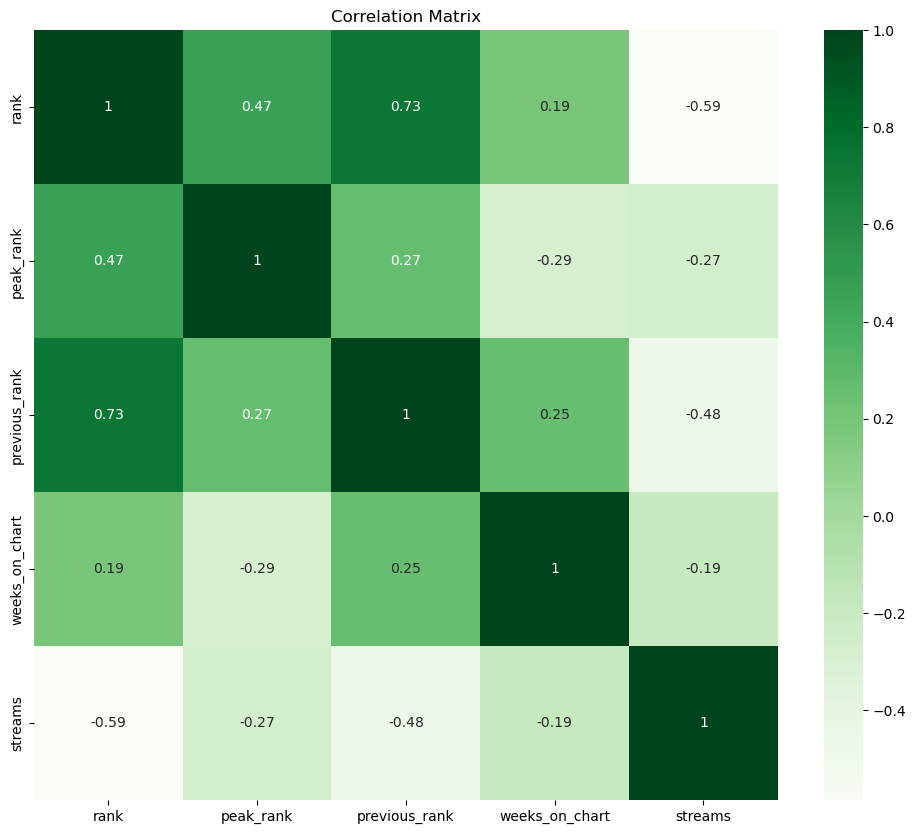

In [102]:
# Extract numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix')
plt.show()

Comment on the relationship between the features:
- The `previous_rank` and `rank` columns have a strong positive correlation with a value of 0.73. This means that the higher the previous rank, the higher the current rank.
- The `rank` and `stream` has a negative correlation with a value of -0.59. It is quite of interesting that is the higher rank mean larger number represent for the rank. Thus, the smaller number showed in `rank` column, the higher the stream number.
- The `previous_rank` and `stream` columns have a negative correlation with a value of -0.48. This is similar to the relationship between `rank` and `stream`, the higher the previous rank (smaller the number represented for `previous_rank`), the higher the stream number.


## **Questions**
**Question 1:** What strategy should the artist use to launch their product on Spotify in 2024 to maximize the number of streams?
- Purpose: Find out the top months that the artist release new song and using these information to provide insights about what strategy the artist should use to launch their product on Spotify in 2024 to maximize the number of streams.
- Steps to answer:
    + Calculate the total number of songs released each month in 2024.
    + Create a bar chart showing the number of songs released each month in 2024.
    + Identify the months with a significantly higher number of song releases in 2024.
    + Provide insights and propose a strategy for product releases.

**Question 2:** Should the artist choose to release a personal product or a collaboration in 2024? Compare the streams between the collaboration and the single to see which one is more effective?
- Purpose: Compare the streams between the collaboration and the single to see which one is more effective. From that, we can provide insights about the trend of collaboration and developed trends for the artist in 2024 (working alone or collaborating with other artists).
- Steps to answer:
    + Identify the number of songs that are collaboration and single in 2024.
    + Calculate the average number of streams for solo and collaboration in 2024.
    + Compare the average number of streams between solo and collaboration in 2024.
    + Provide insights and determine which strategy is more effective for the artist in 2024.

**Question 3:** How the artist's market share based on audience's preference in 2024, Vietnamese or international artist?
- Purpose: Identify the artist with the most songs on the chart, the number of songs, and whether the artist is Vietnamese or international. From that, we can provide insights on the audience's preference for Vietnamese or international artists in 2024.
- Steps to answer:
    + Calculate the number of songs each artist has on the chart in 2024.
    + Identify the artist with the most songs on the chart in 2024.
    + Determine whether the artist is Vietnamese or international.
    + Provide insights on the audience's preference for artists in 2024.

**Question 4:** What is the trend of removing a song from the chart top 20?
- Purpose: Identify the trend of removing a song from the chart top 20. From that, we can provide insights on the trend of turnover a song from the chart in 2024.
- Steps to answer:
    + Filter the DataFrame for songs that have been in the top 20.
    + Calculate the duration each song stays in the top 20.
    + Compute the average duration.
    + Analyze the trend of song turnover in the top 20.

**Question 5:** What is the average time a song rises to the top 20 of the chart wheather calculated from the release date?
- Purpose: Gain the average time a song rises to the top 20 of the chart from the release date. From that, we can provide insights on the time it takes for a song to rise to the top 20 of the chart in 2024.
- Steps to answer:
    + Calculate the time each song rises to the top 20 from the release date.
    + Compute the average time.
    + Analyze the trend of the time it takes for a song to rise to the top 20.

Save the DataFrame to a new csv file named `spotify_charts_cleaned_v2.csv` in the folder `cleaned_data`.

In [60]:
df.to_csv('cleaned_data/spotify_charts_cleaned_v2.csv', index=False)